<a href="https://colab.research.google.com/github/faithfulness121/beginner-project/blob/main/Market_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
toy_data =[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
       ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
       ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
       ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [8]:
te=TransactionEncoder()
te_array=te.fit(toy_data).transform(toy_data)
df=pd.DataFrame(te_array, columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [12]:
items= apriori(df,min_support=0.6,use_colnames=True)
items




,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [13]:
#generate association
rules =association_rules(items,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.60,-0.250,0.750
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.60,-0.250,0.750
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,1.0,0.12,inf,0.50,0.75,1.000,0.875
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,1.0,0.12,1.6,1.00,0.75,0.375,0.875


In [20]:
#loading dataset and converting to list

df=pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)


transaction=df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
transaction[0:10]



[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [21]:
te =TransactionEncoder()
te_array=te.fit(transaction).transform(transaction)
df=pd.DataFrame(te_array, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
frequent_items =apriori(df,min_support=0.02,use_colnames=True)
rules =association_rules(frequent_items,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
3,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
4,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,1.0,0.008647,1.123778,0.379218,0.103279,0.110144,0.204897
90,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,1.0,0.008756,1.174209,0.444850,0.094474,0.148363,0.209194
91,(spaghetti),(shrimp),0.174110,0.071457,0.021197,0.121746,1.703760,1.0,0.008756,1.057260,0.500143,0.094474,0.054159,0.209194
92,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,1.0,0.009023,1.190117,0.462740,0.094465,0.159746,0.213129


In [23]:
top_rules=rules.sort_values(by='lift',ascending=False)
top_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
65,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
64,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
87,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
86,(spaghetti),(olive oil),0.174110,0.065858,0.022930,0.131700,1.999758,1.0,0.011464,1.075829,0.605334,0.105651,0.070484,0.239939
79,(mineral water),(soup),0.238368,0.050527,0.023064,0.096756,1.914955,1.0,0.011020,1.051182,0.627330,0.086760,0.048690,0.276610
78,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
52,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,1.0,0.011245,1.156781,0.526755,0.117219,0.135532,0.214826
53,(milk),(frozen vegetables),0.129583,0.095321,0.023597,0.182099,1.910382,1.0,0.011245,1.106099,0.547490,0.117219,0.095921,0.214826
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256


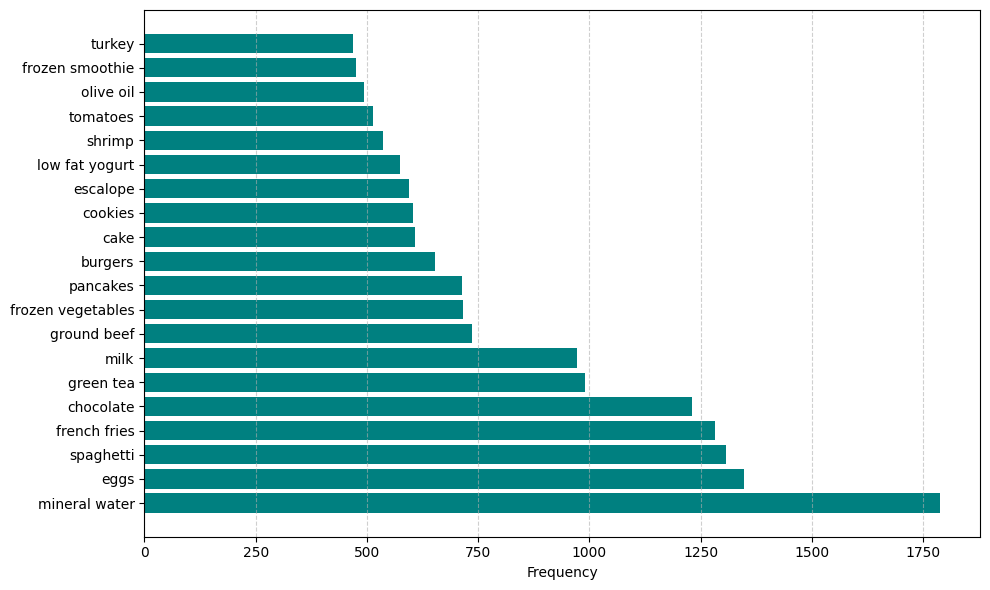

In [30]:

# Count item frequency
flat_items = [item for sublist in transaction for item in sublist]
item_counts = Counter(flat_items)

# Create DataFrame
item_freq_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Frequency'])
top_items_df = item_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_items_df['Item'], top_items_df['Frequency'], color='teal')
plt.xlabel('Frequency')
plt.title='Top 20 Most Frequent Items in Transactions',
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


from the above datset some item like spaghetti works with beef and olive with lift greater than 1 this show this item are brought along side each other

1.Business owner can market this product better by making a commercial video(advert placement) that show how these item are used together e.g making Spaghetti Bolognese

